# Generate Light Curves

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

directory = "/storage/experiments/2021/0711_bourka_stiavnica"
directory = "/storage/experiments/2021/0714_bourka_stiavnica_nocni"
directory = "/storage/experiments/2021/0605_bourka_radosovice"
directory = "/storage/experiments/2021/0725_bourka_ratmirov"
#directory = "/storage/experiments/2021/0726_bourka_zabori"
directory = "/storage/experiments/2021/0803_bourka_votice"
directory = "/storage/experiments/2021/0807_bourka_sobeslav"


In [26]:
for f in glob.iglob(directory + "/video/*.mp4"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]

        b = np.zeros(4000)

        cap = cv2.VideoCapture(f)

        count = 0
        first = True
        while True:
            ret,frame = cap.read()

            if (not ret):
                break

            frame_old = frame
            crop_img = frame[0:859, 0:927] #frame[0:768, 0:1024]
            b[count] = crop_img.ravel().sum() / (860 * 928)
            
            #if (b[count] == 0):
            #    break
            count = count + 1

        cap.release()
        print(f, count)
        pd.DataFrame(b[:count]).to_csv(f + '.csv')
        
    except Exception as e: 
        print (e)
        pass
print('end')

/storage/experiments/2021/0807_bourka_sobeslav/video/1628430961.7903373.mp4 3221
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431603.790285.mp4 3221
/storage/experiments/2021/0807_bourka_sobeslav/video/1628432202.39826.mp4 3221
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430105.617505.mp4 3225
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431939.2651453.mp4 3223
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4 3221
/storage/experiments/2021/0807_bourka_sobeslav/video/1628429473.5873687.mp4 3224
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430372.7465947.mp4 3224
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431195.5110645.mp4 3221
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430616.798702.mp4 3222
/storage/experiments/2021/0807_bourka_sobeslav/video/1628429929.155008.mp4 3225
/storage/experiments/2021/0807_bourka_sobeslav/video/1628432100.1519039.mp4 3223
/storage/experiments/2021/0807_bour

# Plot Light Curves

/storage/experiments/2021/0807_bourka_sobeslav/video/1628430961.7903373.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430105.617505.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430738.2769208.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628432100.1519039.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430254.7804074.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431195.5110645.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628429473.5873687.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431603.790285.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431751.8549378.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431939.2651453.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628432202.39826.mp4.csv
/storage/experiments/2021/0807_bourka_sobesla

/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

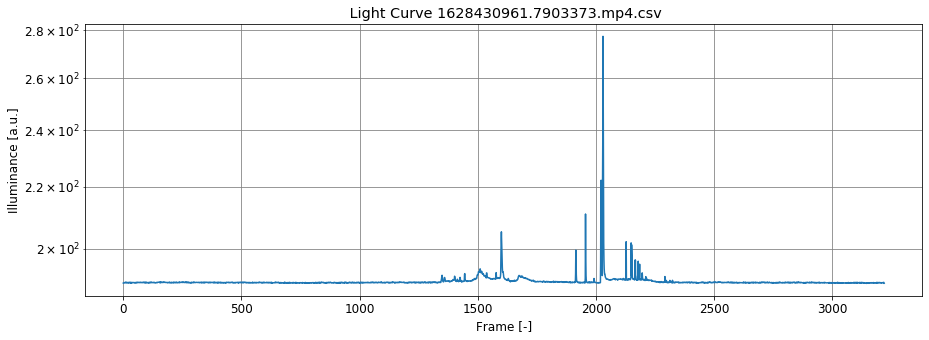

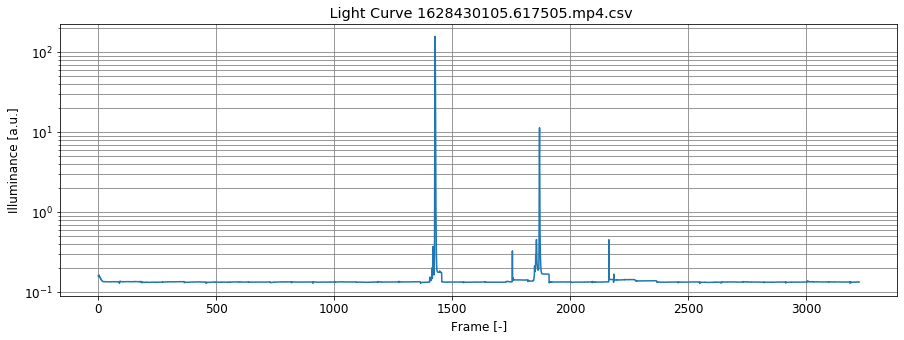

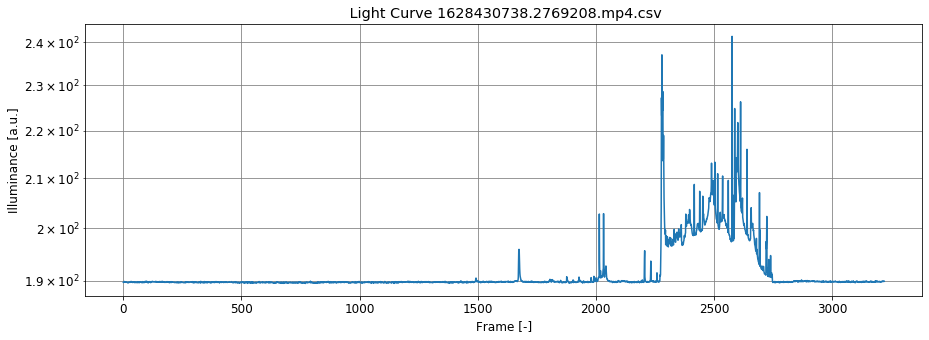

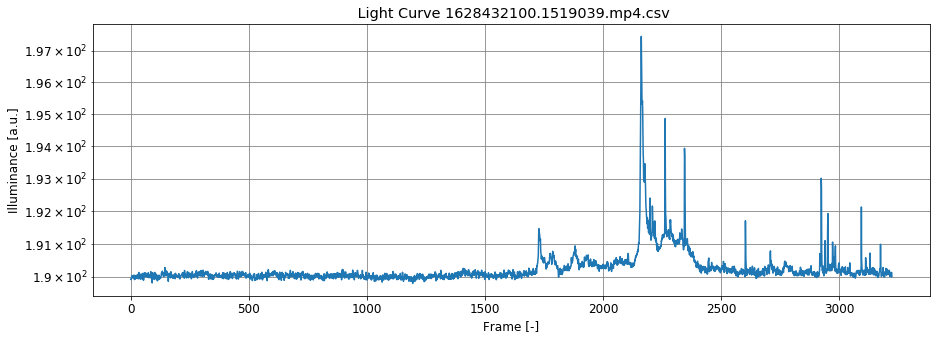

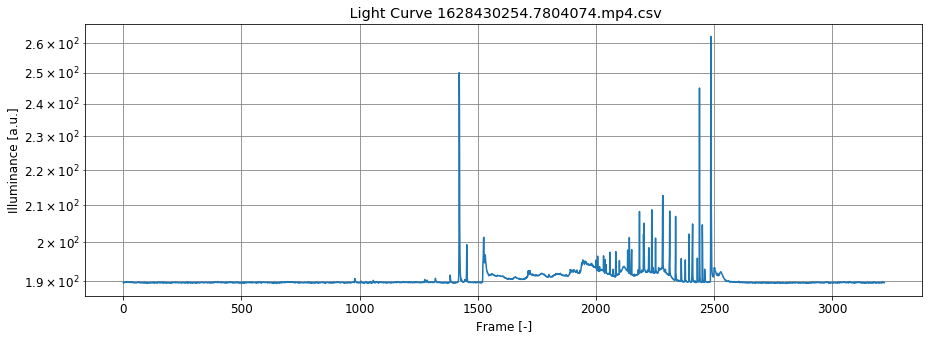

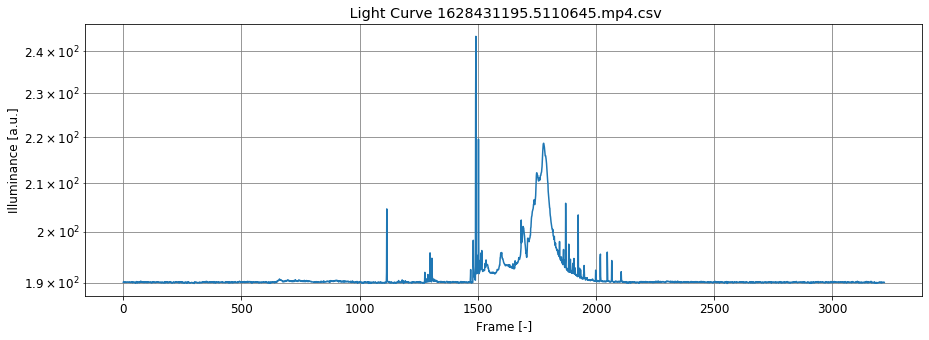

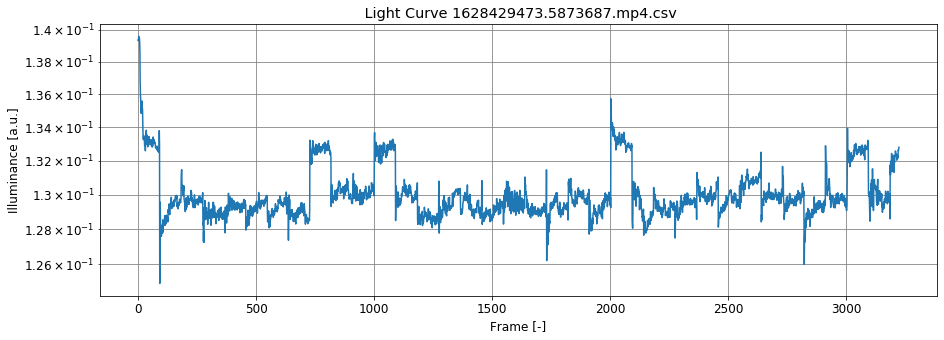

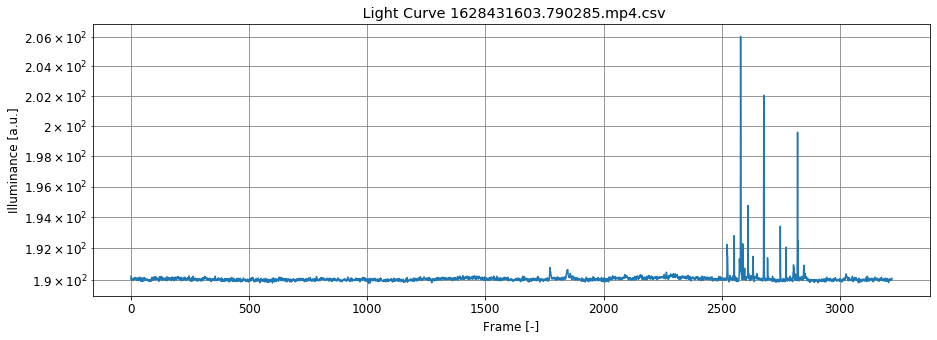

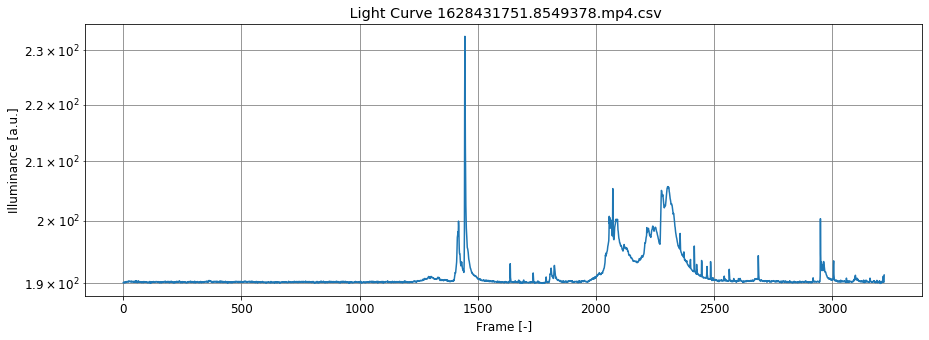

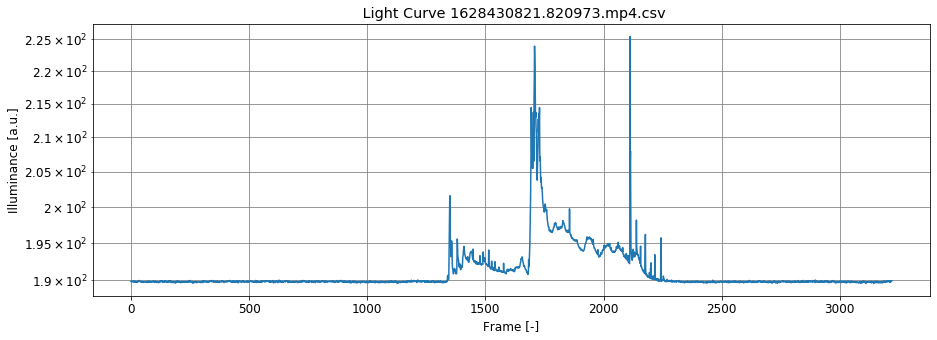

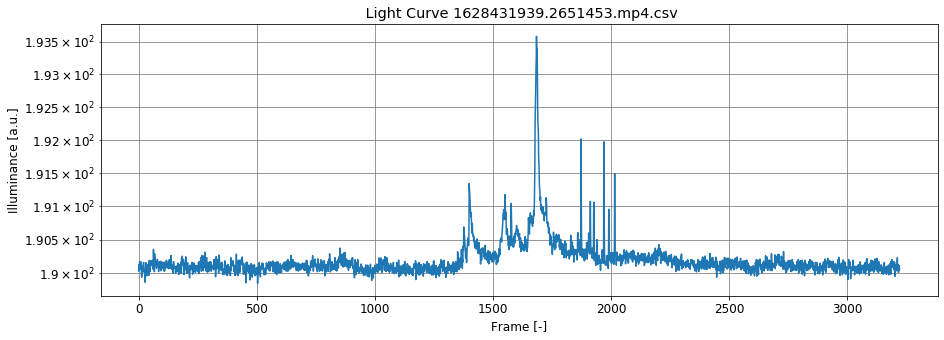

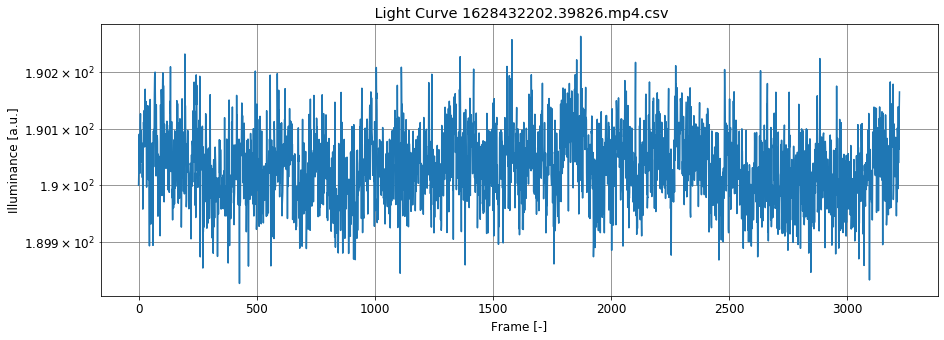

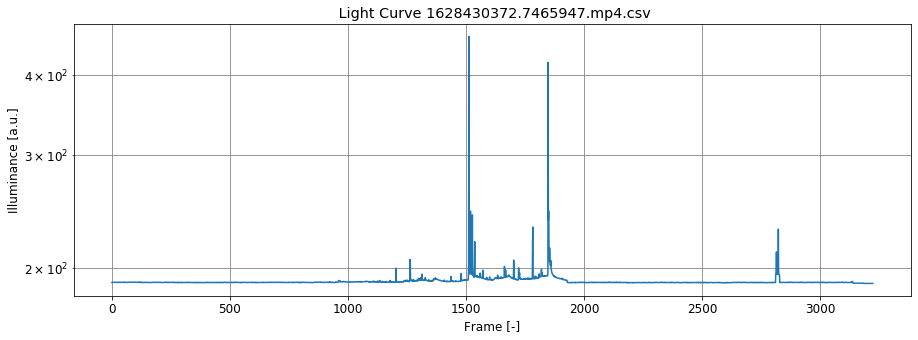

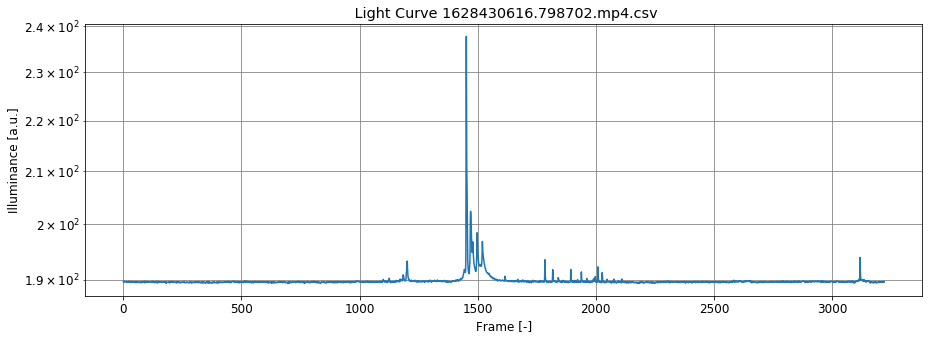

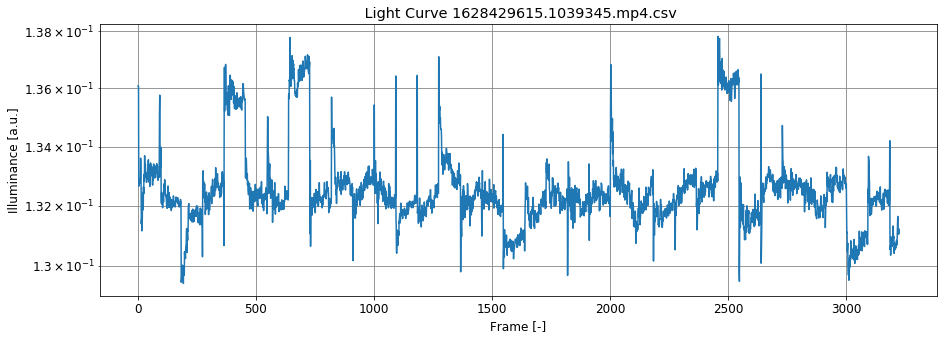

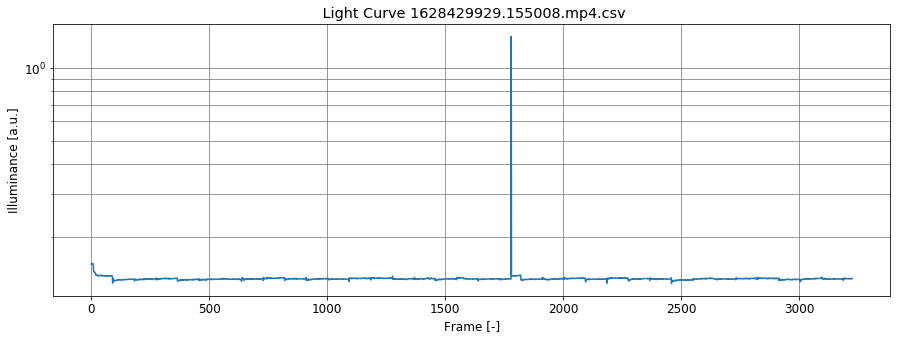

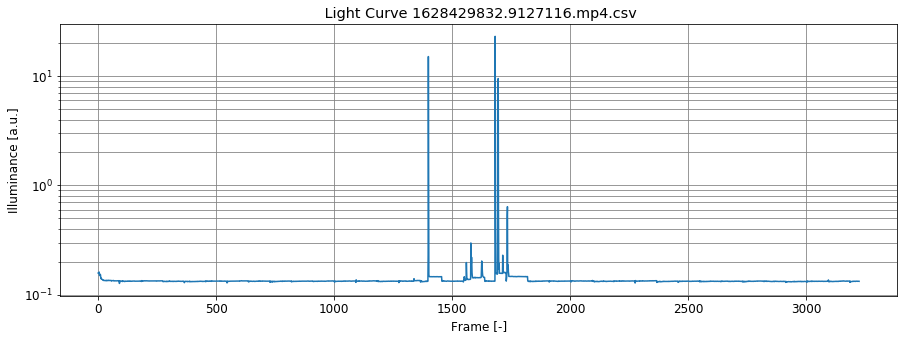

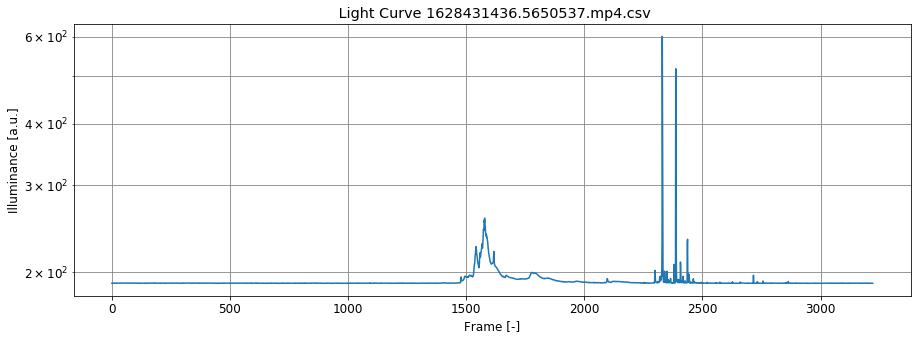

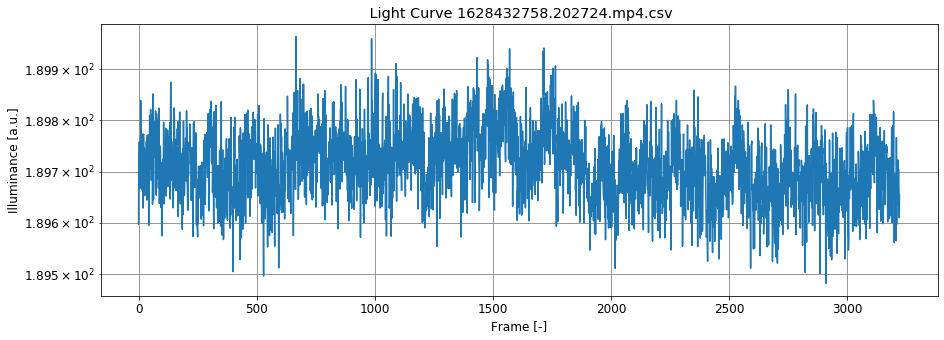

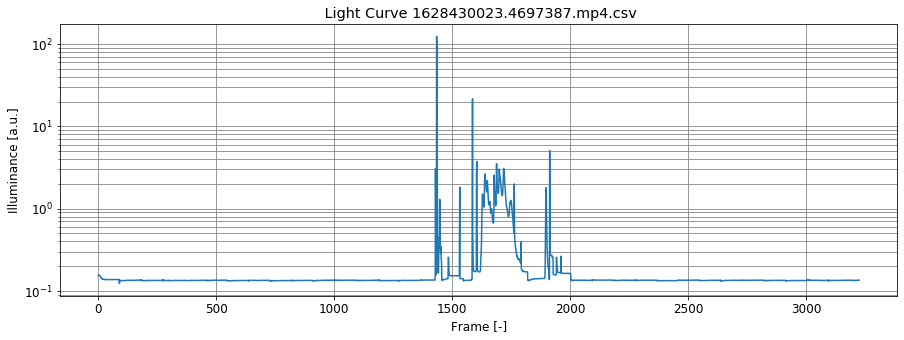

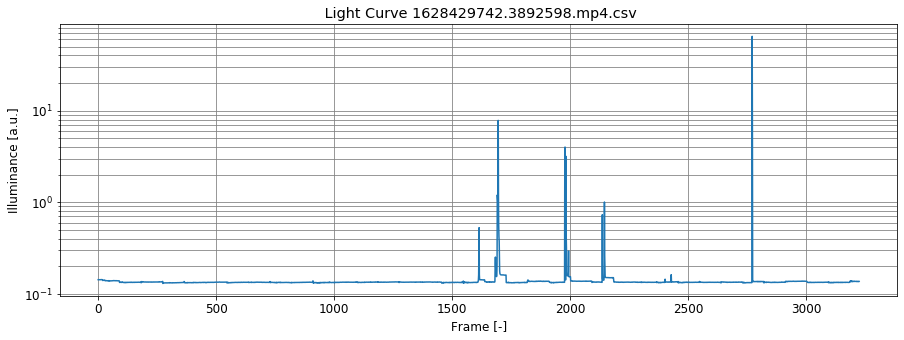

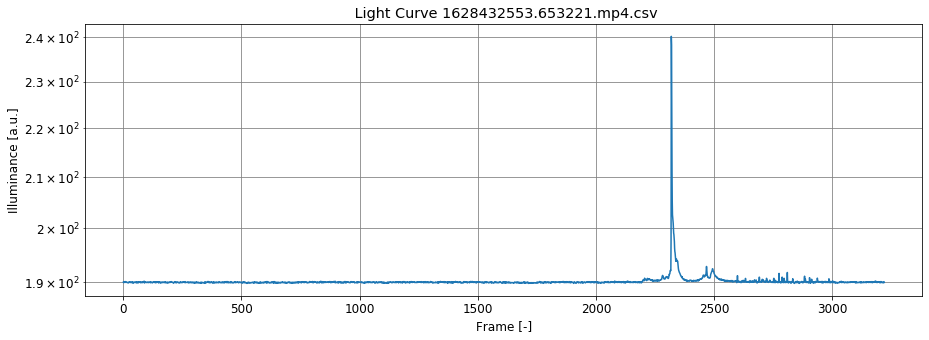

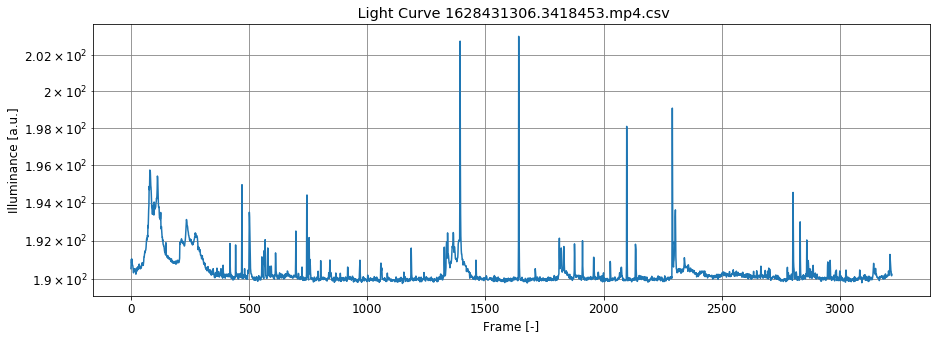

In [27]:
for f in glob.iglob(directory + "/video/*.mp4.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        print(f)
        y = pd.read_csv(f)

        plt.figure(figsize=(15,5))
        plt.rc('font', size=12)    

        plt.plot(y['0'])
        plt.yscale('log')
        plt.title(' Light Curve ' + st)
        plt.xlabel('Frame [-]')
        plt.ylabel('Illuminance [a.u.]')
        plt.grid(b=True, which='major', color='grey', linestyle='-')
        plt.grid(b=True, which='minor', color='grey', linestyle='-')
        #plt.xticks(np.arange(0, 4000, 100))

    except:
        pass


# Generate images with lightcurves

In [30]:
os.mkdir(directory + '/video/output')

FileExistsError: [Errno 17] File exists: '/storage/experiments/2021/0807_bourka_sobeslav/video/output'

/storage/experiments/2021/0807_bourka_sobeslav/video/1628430961.7903373.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430105.617505.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430738.2769208.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628432100.1519039.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430254.7804074.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431195.5110645.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628429473.5873687.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431603.790285.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431751.8549378.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431939.2651453.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628432202.39826.mp4.csv
/storage/experiments/2021/0807_bourka_sobesla

/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: Runtim

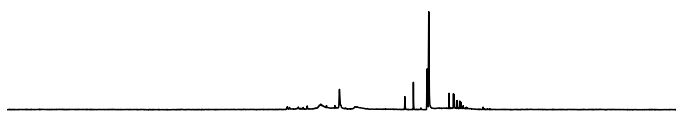

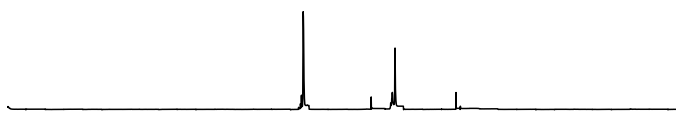

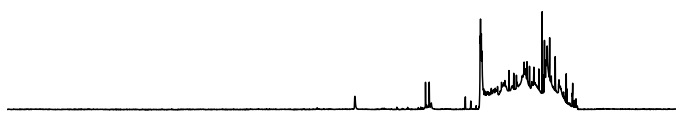

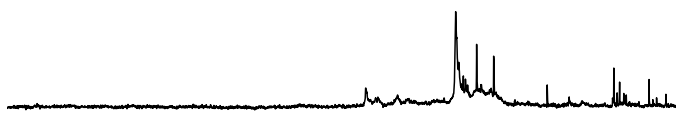

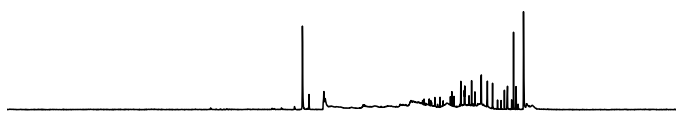

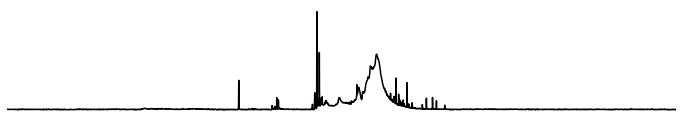

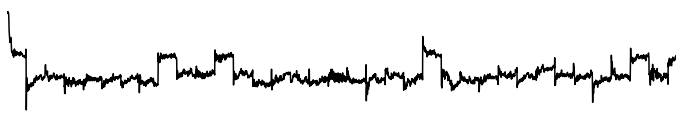

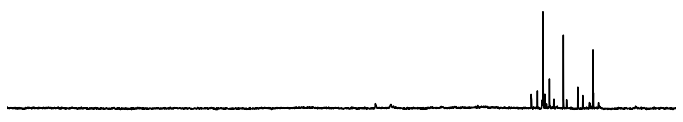

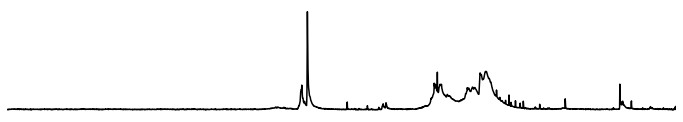

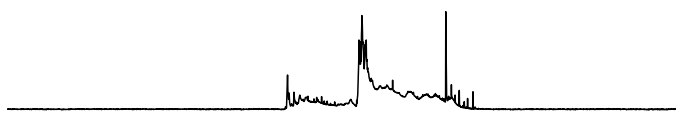

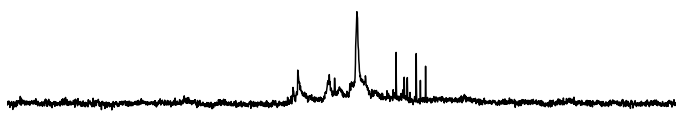

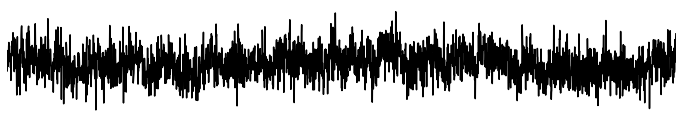

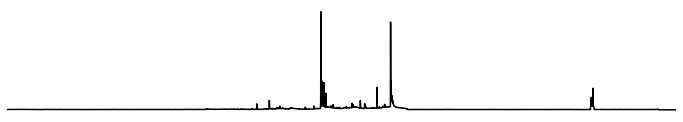

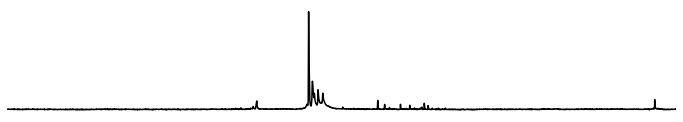

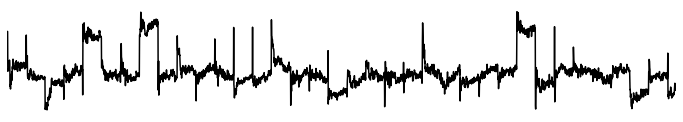

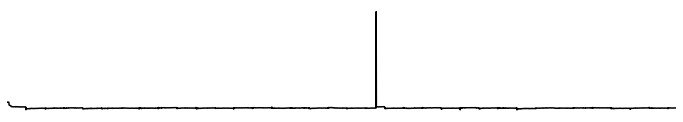

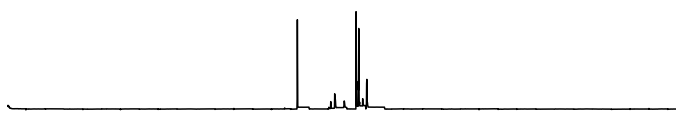

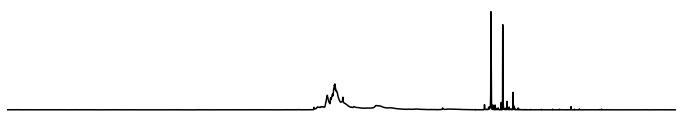

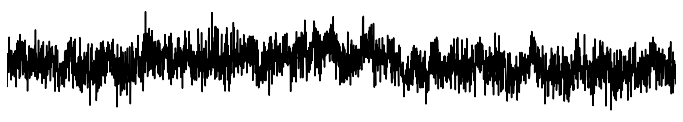

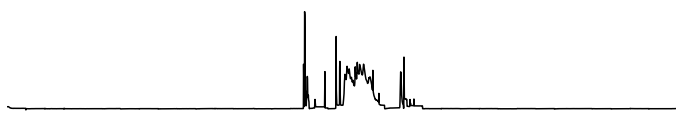

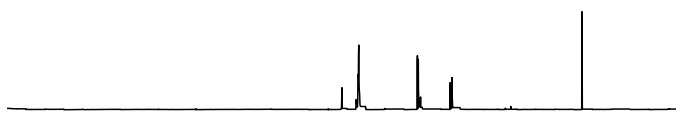

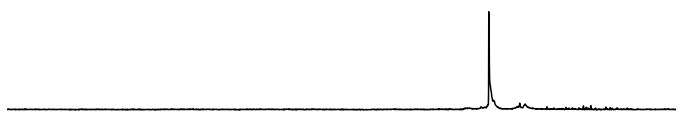

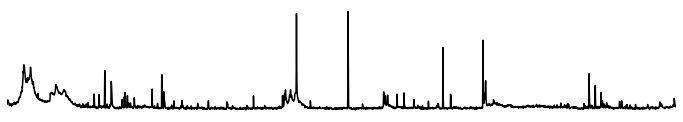

In [29]:
for f in glob.iglob(directory + "/video/*.mp4.csv"): # generator, search immediate subdirectories 
    s = f.split('/')
    st = s[len(s)-1]
    print(f)
    y = pd.read_csv(f)

    w = 9.29
    h = 1.5
    
    fig = plt.figure(frameon=False)
    fig.set_size_inches(w,h)
    fig.tight_layout()
    #ax = plt.Axes(fig, [0, 0, 1, 1])
    #ax.set_axis_off()
    #fig.add_axes(ax)
    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.axis('off')    
    
    plt.plot(y.index,y['0'], color='black')
    plt.yscale('log')
    plt.xlim([0,len(y)])
    fig.savefig(directory + '/video/output/' + st + '.png', dpi=100, bbox_inches='tight', pad_inches = 0)

None

# Insert Images with lightcurves in to videos

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

#directory = "/storage/experiments/2021/0711_bourka_stiavnica"

try:
    os.mkdir(directory + '/video/output')
except:
    pass

for f in glob.iglob(directory + "/video/*.mp4"): # generator, search immediate subdirectories 
    s = f.split('/')
    st = s[len(s)-1]
    print(st)
    
    b = np.zeros(30000)

    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(directory + '/video/output/' + st , fourcc, 20.0, (928,928+150))

    cap = cv2.VideoCapture(f)
    video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(video_length)
    
    img = cv2.imread(directory + '/video/output/' + st + '.csv.png')
    img_not = cv2.bitwise_not(img)
    
    count = 0
    while True:
        ret,frame = cap.read()
        if not(ret):
            break

        v_img = cv2.vconcat([img_not, frame])
        pointer = round(count*(928/video_length))
        cv2.line(v_img,(pointer,150),(pointer,160),(0,0,255),4)
        count = count + 1
        out.write(v_img)
        
    cap.release()
    out.release()
    print(f)
        
print('end')

1628074776.9199274.mp4
3221
/storage/experiments/2021/0803_bourka_votice/video/1628074776.9199274.mp4
1628074611.9133008.mp4
3221
/storage/experiments/2021/0803_bourka_votice/video/1628074611.9133008.mp4
1628074510.5107849.mp4
3222
/storage/experiments/2021/0803_bourka_votice/video/1628074510.5107849.mp4
1628073670.1724613.mp4
3222
/storage/experiments/2021/0803_bourka_votice/video/1628073670.1724613.mp4
1628073388.5063922.mp4
3222
/storage/experiments/2021/0803_bourka_votice/video/1628073388.5063922.mp4
1628074332.3568113.mp4
3222
/storage/experiments/2021/0803_bourka_votice/video/1628074332.3568113.mp4
1628073927.0080833.mp4
3221
/storage/experiments/2021/0803_bourka_votice/video/1628073927.0080833.mp4
1628074133.6773267.mp4
3222
/storage/experiments/2021/0803_bourka_votice/video/1628074133.6773267.mp4
end


# Plot lightcurves into one image

/storage/experiments/2021/0803_bourka_votice/video/1628074133.6773267.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628073388.5063922.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628074776.9199274.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628074332.3568113.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628074510.5107849.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628074611.9133008.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628073927.0080833.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628073670.1724613.mp4.csv


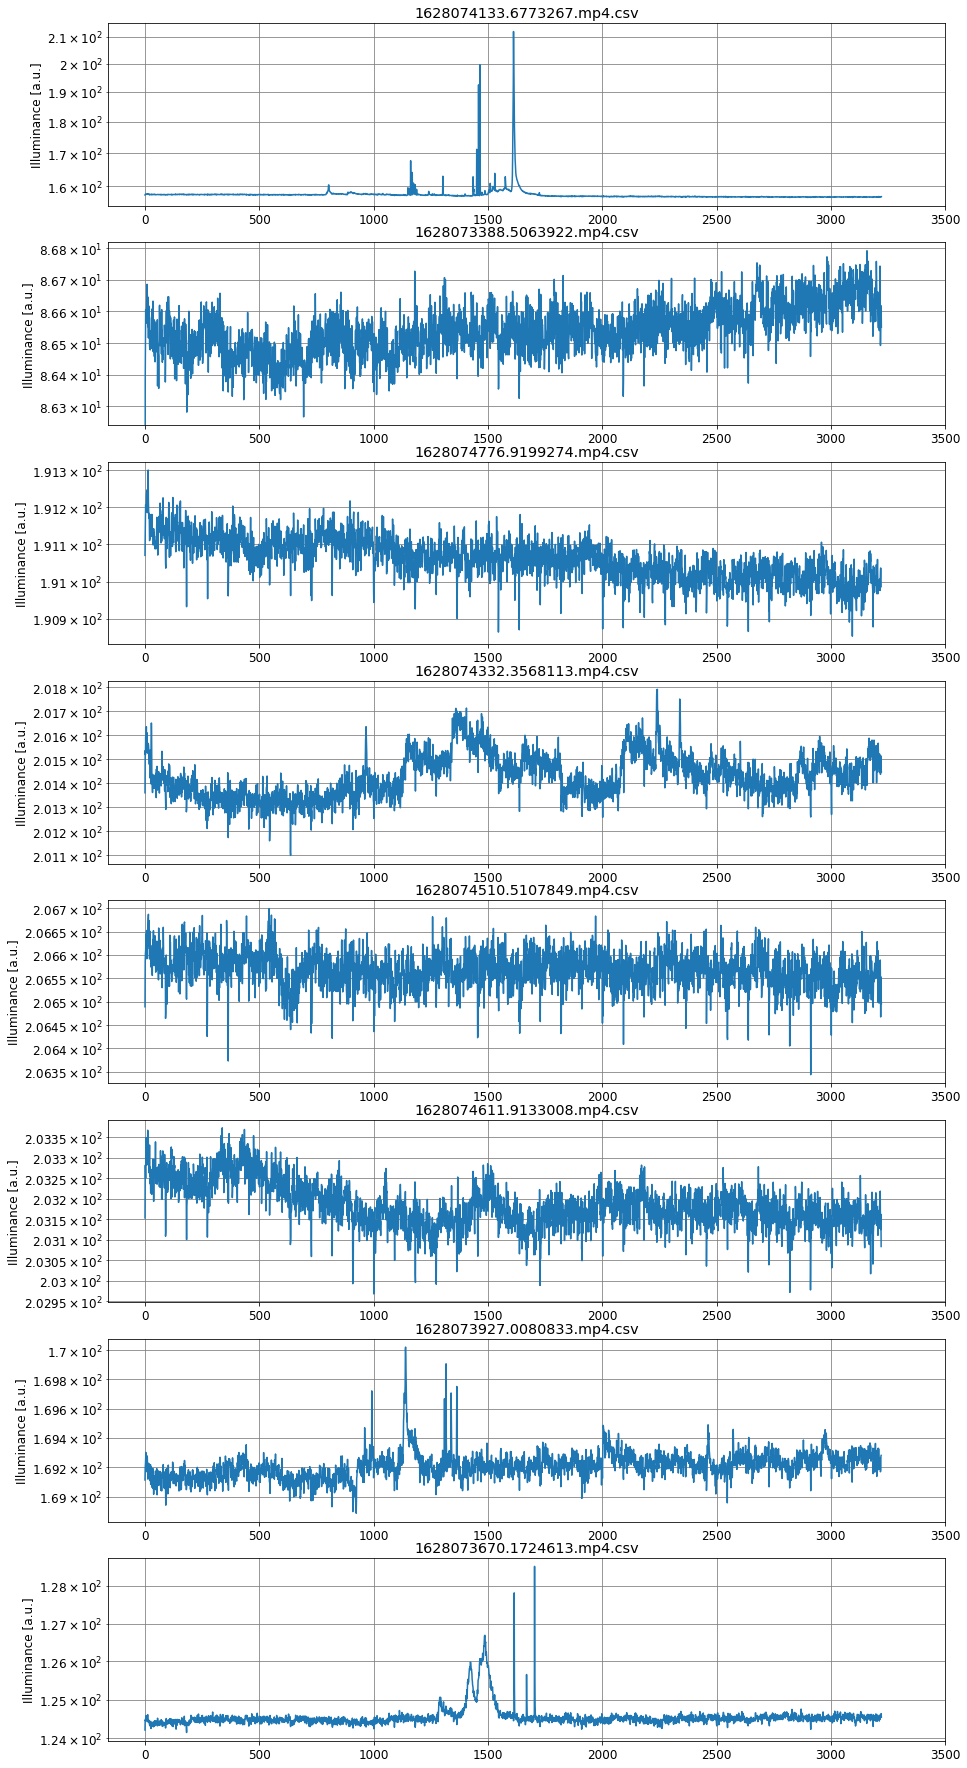

In [24]:
from matplotlib.gridspec import GridSpec

gs=GridSpec(20,1)
fig = plt.figure(figsize=(15,80))
plt.rc('font', size=12)    

i = 0
for f in glob.iglob(directory + "/video/*.mp4.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        print(f)
        y = pd.read_csv(f)

        plt.subplot(gs[i,0])
        plt.plot(y['0'])
        plt.yscale('log')
        plt.title(st)
        #plt.xlabel('Frame [-]')
        plt.ylabel('Illuminance [a.u.]')
        plt.grid(b=True, which='major', color='grey', linestyle='-')
        plt.grid(b=True, which='minor', color='grey', linestyle='-')
        plt.xticks(np.arange(0, 4000, 500))
        i += 1
    except:
        pass

    
fig.savefig(directory + '/video/output/list.png')


# Plot Light Curves in correct Time

/storage/experiments/2021/0803_bourka_votice/video/1628074133.6773267.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628073388.5063922.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628074776.9199274.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628074332.3568113.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628074925.0504754.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628074510.5107849.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628074611.9133008.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628073927.0080833.mp4.csv
/storage/experiments/2021/0803_bourka_votice/video/1628073670.1724613.mp4.csv


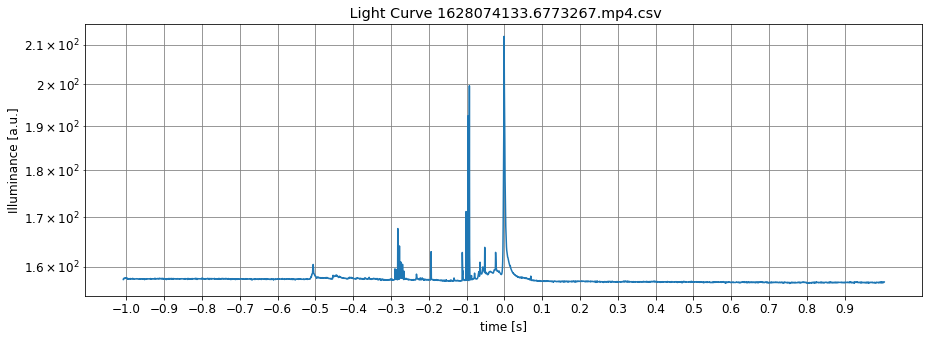

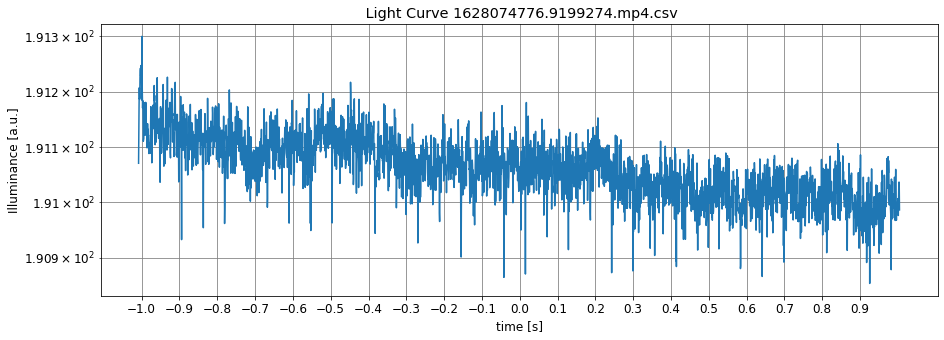

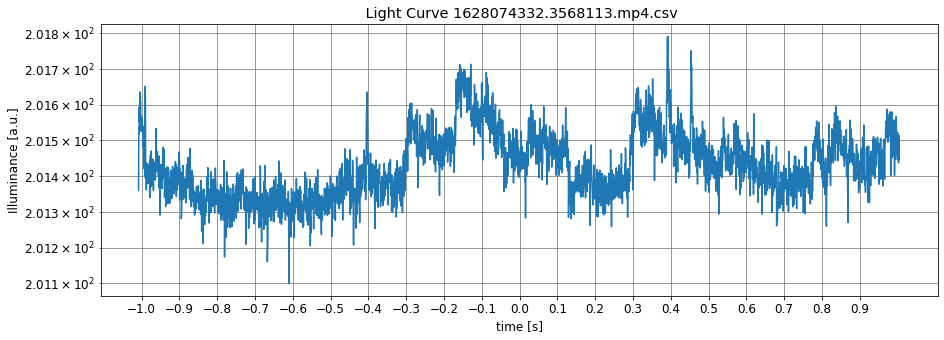

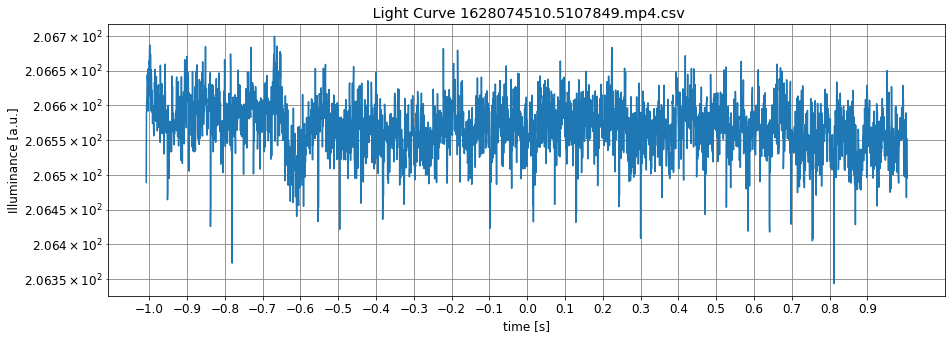

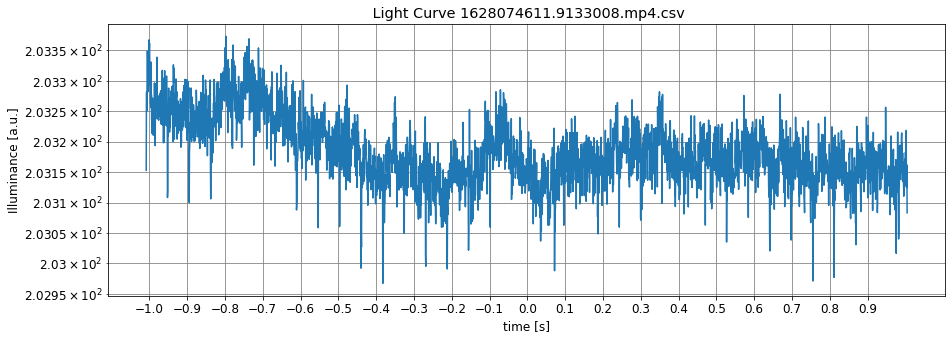

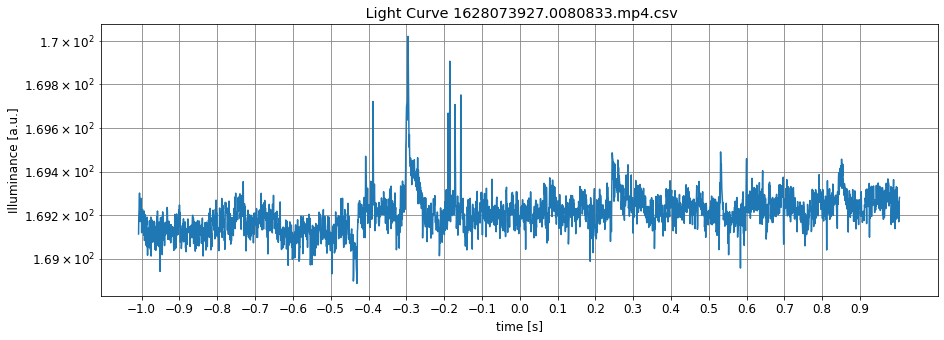

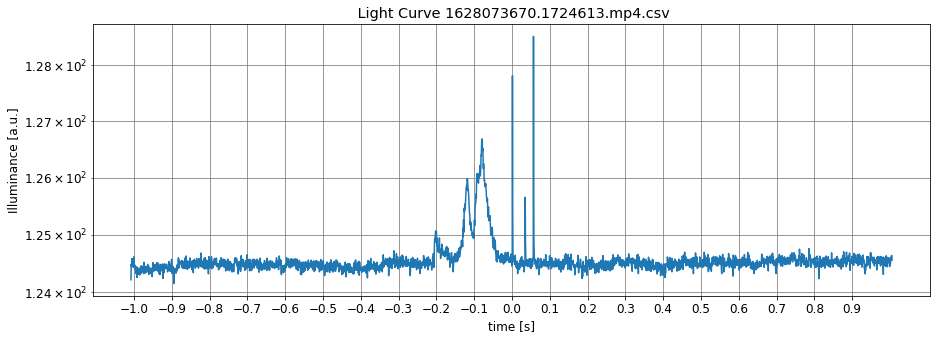

In [16]:
for f in glob.iglob(directory + "/video/*.mp4.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        print(f)
        y = pd.read_csv(f)
        y['time'] = (y.index - 1613)*(1/1600)

        plt.figure(figsize=(15,5))
        plt.rc('font', size=12)    

        plt.plot(y['time'],y['0'])
        plt.yscale('log')
        plt.title(' Light Curve ' + st)
        plt.xlabel('time [s]')
        plt.ylabel('Illuminance [a.u.]')
        plt.grid(b=True, which='major', color='grey', linestyle='-')
        plt.grid(b=True, which='minor', color='grey', linestyle='-')
        plt.xticks(np.arange(-1, 1, 0.1))

    except:
        pass


In [49]:
y['time'] = (y.index - 1500)*(1/1600)
y

Unnamed: 0           0      time
0              0  152.235385 -0.937500
1              1  152.223724 -0.936875
2              2  152.284527 -0.936250
3              3  152.317903 -0.935625
4              4  152.296943 -0.935000
...          ...         ...       ...
3216        3216  152.172327  1.072500
3217        3217  152.209643  1.073125
3218        3218  152.192329  1.073750
3219        3219  152.221078  1.074375
3220        3220  152.175992  1.075000

[3221 rows x 3 columns]

# TO DO:

# Plot Light Curves in correct Time

In [44]:
for f in glob.iglob("./data/*.mp4.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        ss = st.split('.')
        sst = ss[0] + '.' + ss[1]

        y = pd.read_csv(f)

        df = pd.read_table('./data/' + sst + '_first_frame', sep=',', header=None, engine='python' )
        plt.figure(figsize=(15,5))

        plt.plot(np.linspace(df[1],df[3],df[2]-df[0]),y.iloc[:int(df[2]-df[0]),1])
        plt.yscale('log')
        plt.title(' Light Curve ' + st)
        plt.xlabel('Time [s]')
        plt.ylabel('Illuminance [a.u.]')
    except:
        pass


# Plot Light Curve together with Antenna data

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: object of type <class 'pandas.core.series.Series'> cannot be safely interpreted as an integer.


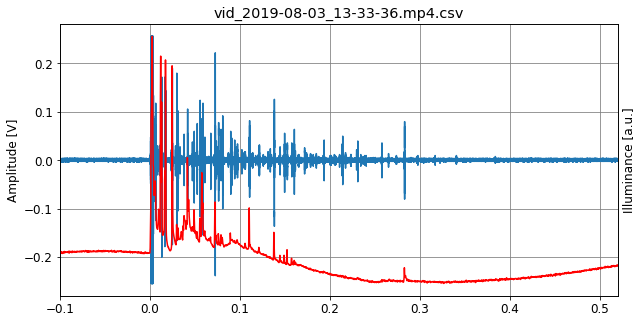

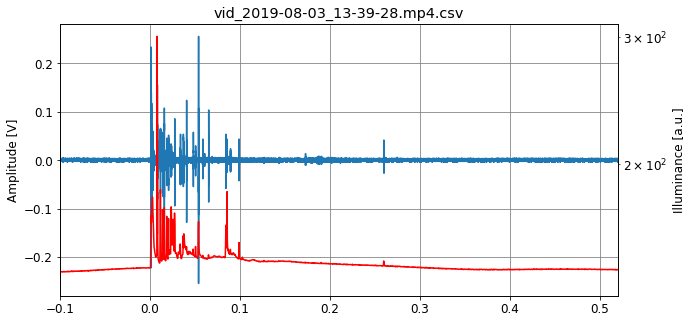

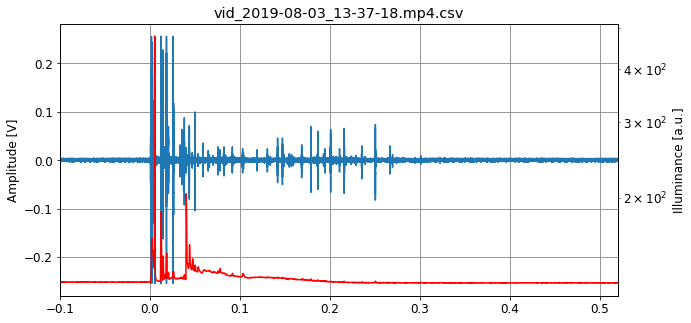

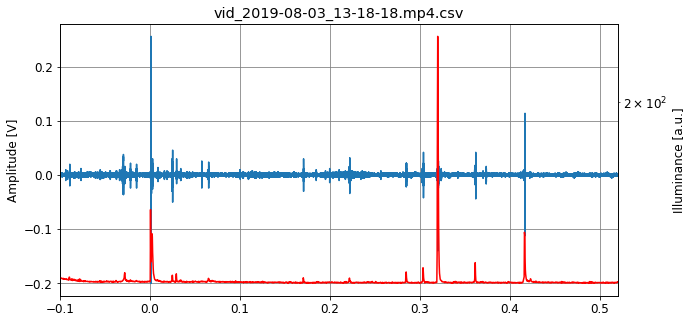

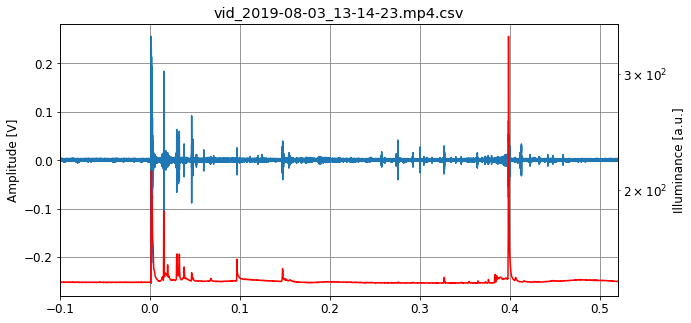

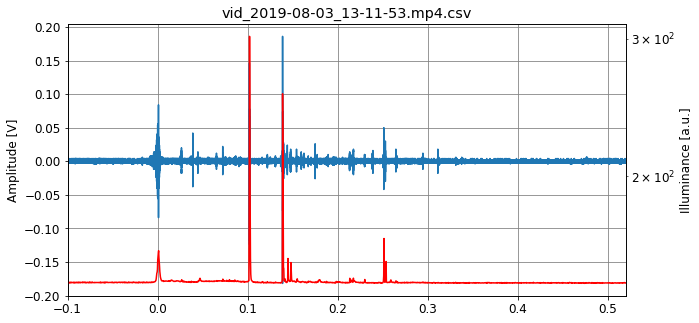

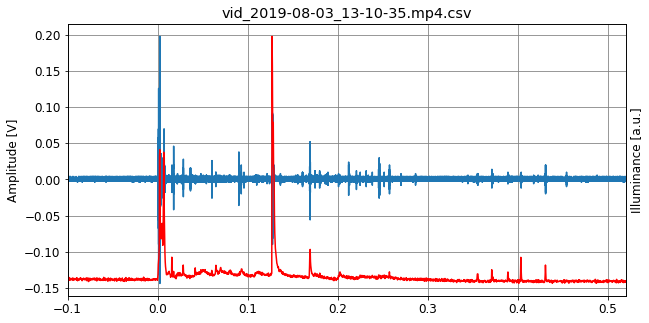

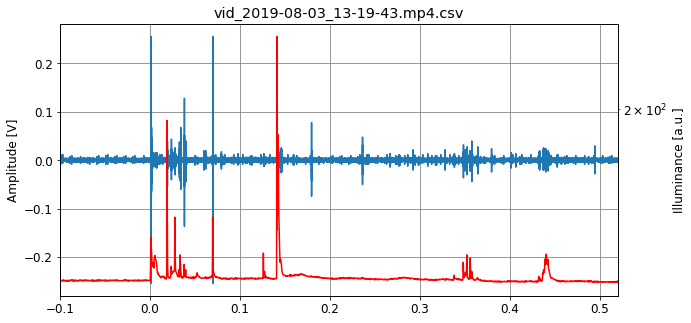

In [155]:
%matplotlib inline

for f in glob.iglob("./data/*.*.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        ss = st.split('.')
        sst = ss[0] + '.' + ss[1]

        y = pd.read_csv(f)

        df = pd.read_table('./data/' + sst + '_first_frame', sep=',', header=None, engine='python' )


        
        param = pd.read_table('./antenna/' + df.iloc[0,4], sep=',', nrows=1, header=0, comment='*',engine='python' )

        timeinc = param['Increment']
        timeoffset = param['Start']

        dfa = pd.read_table('./antenna/' + df.iloc[0,4], sep=',', skiprows=2, header=None, comment='*',engine='python' )

        dfa[0] = pd.to_numeric(dfa[0])

        dfa[0]*=float(param['Increment'])
        dfa[0]+=float(param['Start'])


        plt.figure(figsize=(10,5))
        plt.rc('font', size=12)    

        plt.plot(dfa[0],dfa[1])

        plt.grid(b=True, which='major', color='grey', linestyle='-')
        plt.ylabel('Amplitude [V]')
        plt.xlim(-0.1,0.52)

        plt.twinx()
        
        plt.plot(np.linspace(df[1],df[3],df[2]-df[0]),y.iloc[:int(df[2]-df[0]),1], c='r')
        plt.yscale('log')
        plt.title(st)
        plt.xlabel('Time [s]')
        plt.ylabel('Illuminance [a.u.]')
    except:
        pass

    



ModuleNotFoundError: No module named 'pygame'

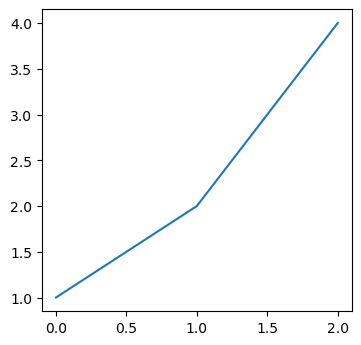

In [10]:
import matplotlib
matplotlib.use("Agg")

import matplotlib.backends.backend_agg as agg


import pylab

fig = pylab.figure(figsize=[4, 4], # Inches
                   dpi=100,        # 100 dots per inch, so the resulting buffer is 400x400 pixels
                   )
ax = fig.gca()
ax.plot([1, 2, 4])

canvas = agg.FigureCanvasAgg(fig)
canvas.draw()
renderer = canvas.get_renderer()
raw_data = renderer.tostring_rgb()

import pygame
from pygame.locals import *

pygame.init()

window = pygame.display.set_mode((600, 400), DOUBLEBUF)
screen = pygame.display.get_surface()

size = canvas.get_width_height()

surf = pygame.image.fromstring(raw_data, size, "RGB")
screen.blit(surf, (0,0))
pygame.display.flip()

crashed = False
while not crashed:
	for event in pygame.event.get():
		if event.type == pygame.QUIT:
			crashed = True

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

directory = "/storage/experiments/2021/0609_bourka_sobeslav/"

f = directory + 'video/' + 'vid_2021-06-09_10-38-03.mp4'

s = f.split('/')
st = s[len(s)-1]

b = np.zeros(30000)

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter(directory + 'output.mp4', fourcc, 20.0, (800,600))

cap = cv2.VideoCapture(f)

count = 0
while True:
    ret,frame = cap.read()
    crop_img = frame[0:565, 0:800] #frame[0:768, 0:1024]
    b[count] = crop_img.ravel().sum() / (800 * 565)

    if (count > 1900):
        for i in range(1900,count):
            cv2.line(frame,(i-1900,int(round(b[i-1]))),(i-1900,int(round(b[i]))),(255,0,255),2)
        #print(int(b[i]))
        out.write(frame)

    if (b[count] == 0):
        break
    count = count + 1
    if (count==2000):
        break

cap.release()
out.release()
print(f)
    
print(count)
print('end')

/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-38-03.mp4
2000
end


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

directory = "/storage/experiments/2021/0609_bourka_sobeslav/"

f = directory + 'video/' + 'vid_2021-06-09_10-38-03.mp4'

s = f.split('/')
st = s[len(s)-1]

b = np.zeros(30000)

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter(directory + 'output.mp4', fourcc, 20.0, (800,600))

cap = cv2.VideoCapture(f)

count = 0
while True:
    ret,frame = cap.read()
    crop_img = frame[0:565, 0:800] #frame[0:768, 0:1024]
    b[count] = crop_img.ravel().sum() / (800 * 565)

    if (count>1500):
        for i in range(1500,count):
            cv2.line(frame,(int(round((i-1500)/((5000-1500)/800))),int(round(b[i-1]))),(int(round((i-1500)/((5000-1500)/800))),int(round(b[i]))),(255,0,255),2)
        #print(int(b[i]))
        out.write(frame)

    if (b[count] == 0):
        break
    count = count + 1
    if (count==5000):
        break

cap.release()
out.release()
print(f)
    
print(count)
print('end')

/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-38-03.mp4
5000
end


# SLAVIA

end


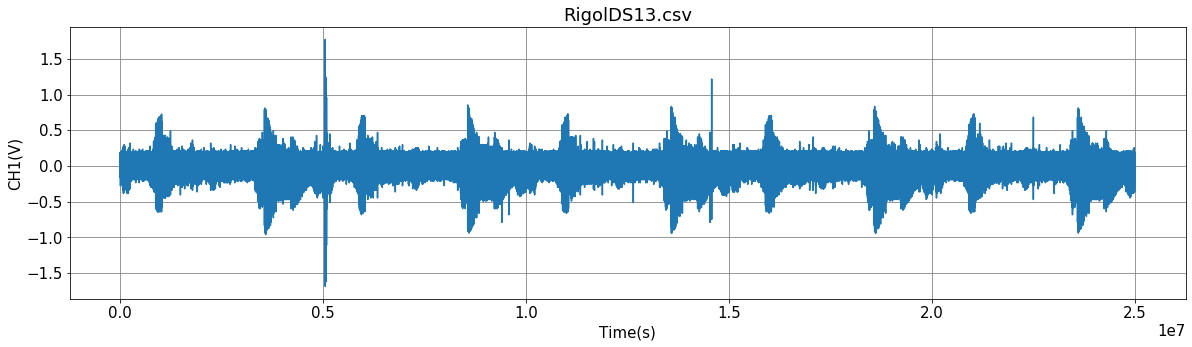

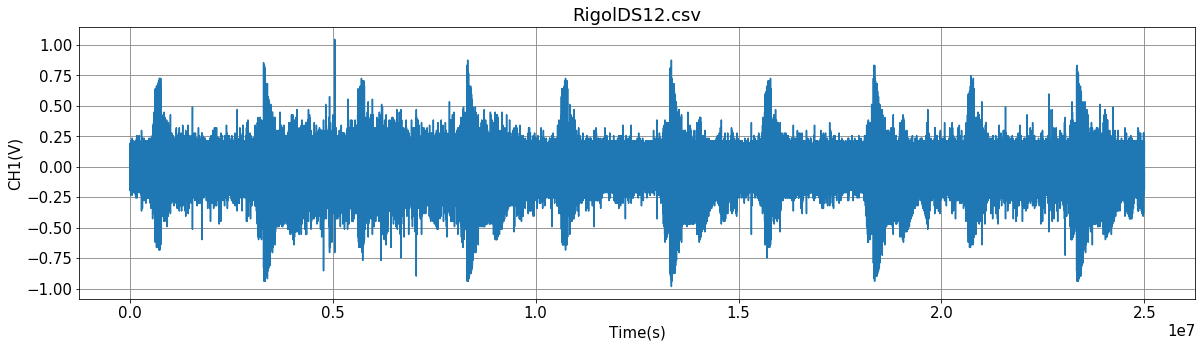

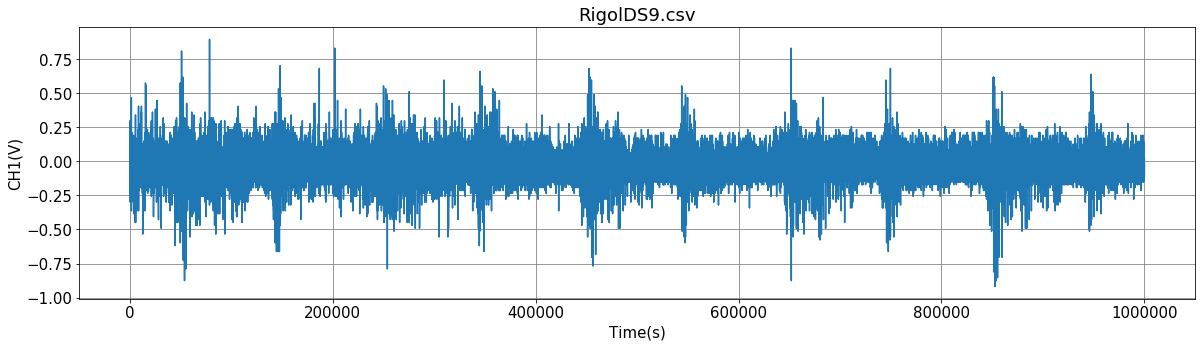

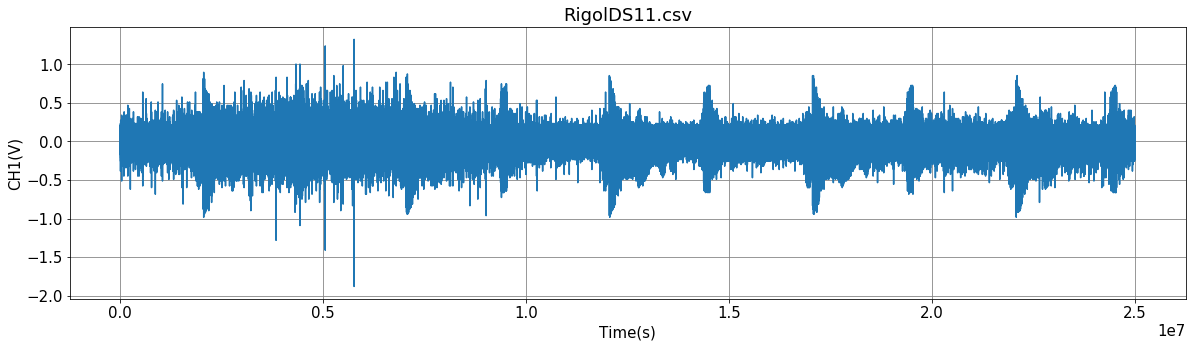

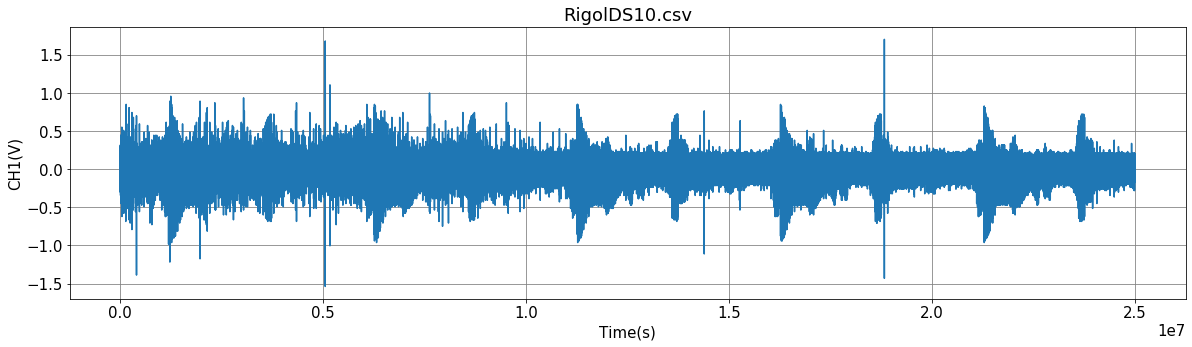

In [12]:
import glob
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

directory = "/storage/experiments/2021/0629_bourka_radosovice"

for f in glob.iglob(directory + "/slavia/*.csv"): # generator, search immediate subdirectories 
    try:
        s = f.split('/')
        st = s[len(s)-1]
        #print(st)
        
        df = pd.read_csv(f, sep=',', header=0)
        #print(df)
        plt.figure(figsize=(20,5))
        plt.tight_layout()
        matplotlib.rcParams.update({'font.size': 15})
        plt.plot(df.index,df['CH1(V)'])
        plt.title(st)
        plt.xlabel('Time(s)')
        plt.ylabel('CH1(V)')
        plt.grid(b=True, which='major', color='grey', linestyle='-')
    except:
        pass
        
print('end')

In [9]:
df

CH1(V)  t0 = -0.0202s   tInc = 4e-09s  Unnamed: 3
0        -0.042726            NaN             NaN         NaN
1        -0.021363            NaN             NaN         NaN
2        -0.021363            NaN             NaN         NaN
3        -0.021363            NaN             NaN         NaN
4        -0.042726            NaN             NaN         NaN
...            ...            ...             ...         ...
24999995 -0.021363            NaN             NaN         NaN
24999996 -0.042726            NaN             NaN         NaN
24999997 -0.042726            NaN             NaN         NaN
24999998 -0.042726            NaN             NaN         NaN
24999999 -0.042726            NaN             NaN         NaN

[25000000 rows x 4 columns]

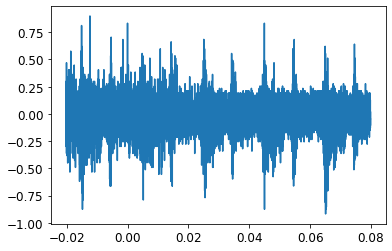

In [7]:
plt.plot(df['Time(s)'],df['CH1(V)'])

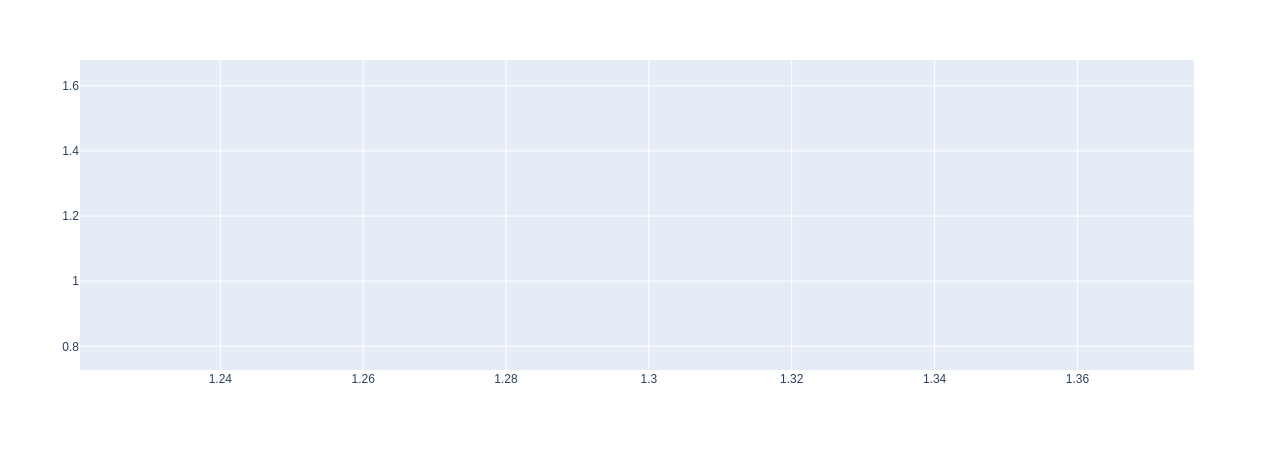

In [8]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = px.line(df)
fig.show()

In [ ]:
data = [go.Scatter(x=df['Time(s)'],y=df['CH1(V)'])]
#layout = go.Layout(title='Flux', yaxis=dict(title='Voltage [V]', type='log'), xaxis=dict(title='Time [s]'))
layout = go.Layout(title='SLAVIA', yaxis=dict(title='Voltage [V]'), xaxis=dict(title='Time [s]'))
fig = go.Figure(data=data, layout=layout)
fig.show()